# Mount The Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# List everything inside My Drive
print("Files/Folders in My Drive:", os.listdir("/content/drive/My Drive"))

# Then check inside 'googlecolab' folder
print("Files/Folders in googlecolab:", os.listdir("/content/drive/My Drive/googlecolab"))

# Then inside 'gnicpl'
print("Files/Folders in gnicpl:", os.listdir("/content/drive/My Drive/googlecolab/gnicpl"))

# Finally inside 'projectfour'
print("Files in projectfour:", os.listdir("/content/drive/My Drive/googlecolab/gnicpl/projectfour"))

Files/Folders in My Drive: ['googlecolab', 'ALL', 'Colab Notebooks']
Files/Folders in googlecolab: ['Untitled0.ipynb', 'Untitled', 'Copy of Player Data LLM .ipynb', 'Untitled1.ipynb', 'Player Data LLM .ipynb', 'LLM trial 1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'AI Ml in Drug Discovery.ipynb', 'GFG Pyhton study', 'GNCIPL Lecture 1: 18-08-2025.ipynb', 'gnicpl', 'Untitled5.ipynb']
Files/Folders in gnicpl: ['projectone', 'data.csv', 'projecttwo', 'projectthree', 'projectfour']
Files in projectfour: ['Breast_GSE45827.csv']


# Load the Data

In [3]:
import pandas as pd

# Define the file path (make sure capitalization and spelling match exactly)
file_path = "/content/drive/My Drive/googlecolab/gnicpl/projectfour/Breast_GSE45827.csv"

# Load the Excel file
data = pd.read_csv(file_path)


# Basic Information

In [4]:
print("Shape of dataset:", data.shape)
print(data.head())

Shape of dataset: (151, 54677)
   samples   type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0       84  basal   9.850040  8.097927  6.424728  7.353027   3.029122   
1       85  basal   9.861357  8.212222  7.062593  7.685578   3.149468   
2       87  basal  10.103478  8.936137  5.735970  7.687822   3.125931   
3       90  basal   9.756875  7.357148  6.479183  6.986624   3.181638   
4       91  basal   9.408330  7.746404  6.693980  7.333426   3.169923   

    1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  6.880079  4.963740  4.408328  ...             12.229711   
1  7.542283  5.129607  4.584418  ...             12.178531   
2  6.562369  4.813449  4.425195  ...             12.125108   
3  7.802344  5.490982  4.567956  ...             12.111235   
4  7.610457  5.372469  4.424426  ...             12.173642   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0             11.852955            13.658701            13.477698   
1             11.80

In [5]:
# Remove duplicates, handle nulls
data = data.drop_duplicates().dropna()

In [6]:
# Check shape again after cleaning
print("Shape after cleaning:", data.shape)

Shape after cleaning: (151, 54677)


In [7]:
# Count nulls
print("Null values per column:\n", data.isnull().sum().head(20))  # first 20 cols

Null values per column:
 samples         0
type            0
1007_s_at       0
1053_at         0
117_at          0
121_at          0
1255_g_at       0
1294_at         0
1316_at         0
1320_at         0
1405_i_at       0
1431_at         0
1438_at         0
1487_at         0
1494_f_at       0
1552256_a_at    0
1552257_a_at    0
1552258_at      0
1552261_at      0
1552263_at      0
dtype: int64


In [8]:
# Check for duplicate sample IDs (just in case)
print("Unique samples:", data['samples'].nunique())
print("Total samples:", data.shape[0])

Unique samples: 151
Total samples: 151


# Define Features and Labels

In [9]:
# Features = gene expression data
X = data.drop(columns=["samples", "type"])

# Labels = cancer subtype
y = data["type"]

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (151, 54675)
Labels shape: (151,)


# Standardize Features

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (Dimensionality Reduction)

In [11]:
# Option 1: Fixed number of components
from sklearn.decomposition import PCA

pca = PCA(n_components=50)  # keep top 50 principal components
X_pca = pca.fit_transform(X_scaled)

print("Explained variance (first 5 PCs):", pca.explained_variance_ratio_[:5])

Explained variance (first 5 PCs): [0.1118076  0.10185951 0.05222938 0.03383956 0.03293161]


Original shape: (151, 54675)
Reduced shape (PCA): (151, 106)


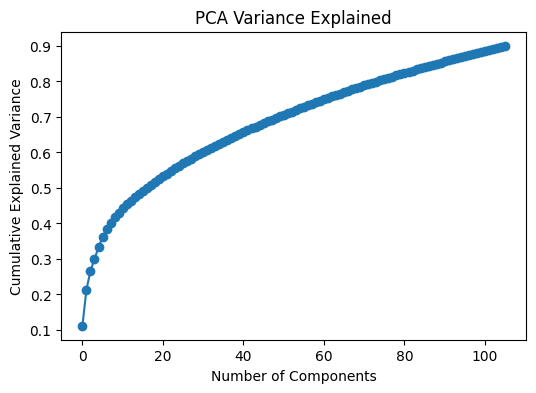

In [12]:
# Option 2: Capture 90% of variance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)   # Keep 90% variance
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape (PCA):", X_pca.shape)

# Step 3: Plot Cumulative Explained Variance
# Plot explained variance
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Variance Explained")
plt.show()


# K-Means Clustering

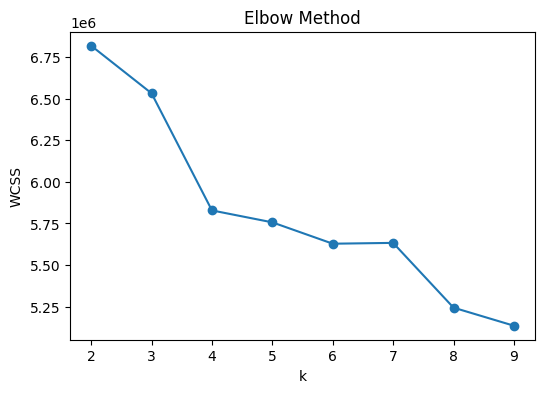

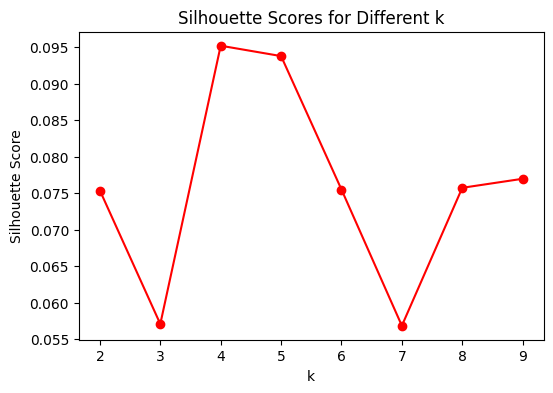

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Step 1:  Elbow Method
plt.figure(figsize=(6,4))
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Step 2: Silhouette Score
plt.figure(figsize=(6,4))
plt.plot(range(2, 10), silhouette_scores, marker='o', color='red')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k")
plt.show()


# Final KMeans Model

KMeans cluster counts:
 Cluster_KMeans
1    66
0    48
2    23
3    14
Name: count, dtype: int64


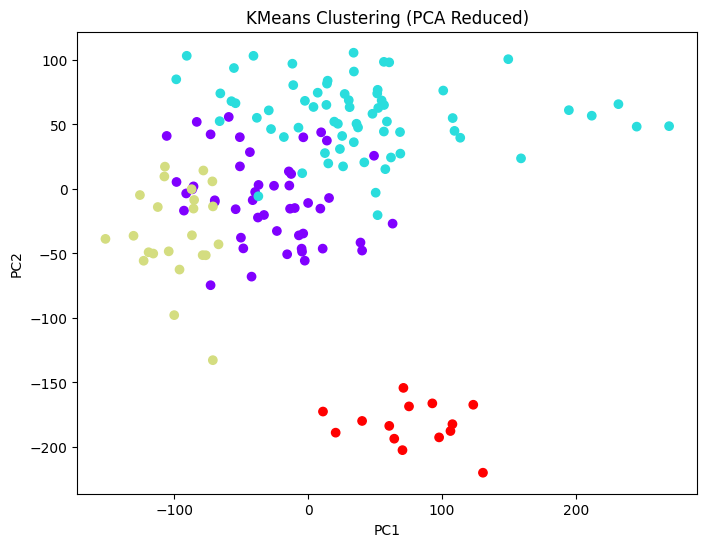

Adjusted Rand Index (KMeans vs True Labels): 0.41535033195918836


In [14]:
from sklearn.metrics import adjusted_rand_score  # ✅ add this import

# Assume 4 clusters (Basal, LumA, LumB, Her2) -> adjust if elbow suggests otherwise
kmeans_final = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans_final.fit_predict(X_pca)

data['Cluster_KMeans'] = clusters_kmeans
print("KMeans cluster counts:\n", data['Cluster_KMeans'].value_counts())

# Visualize PCA clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_kmeans, cmap='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clustering (PCA Reduced)")
plt.show()

# Compare with true labels
ari_kmeans = adjusted_rand_score(y, clusters_kmeans)
print("Adjusted Rand Index (KMeans vs True Labels):", ari_kmeans)


# Hierarchical Clustering

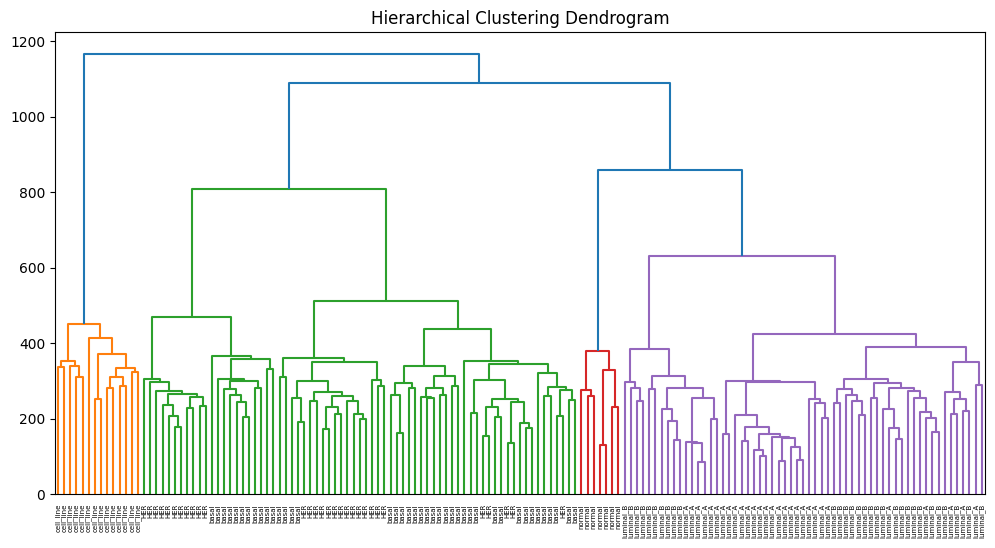

Cophenetic Correlation: 0.5339161944705717
Hierarchical cluster counts:
 Cluster_Hierarchical
0    71
2    59
1    14
3     7
Name: count, dtype: int64
Adjusted Rand Index (Hierarchical vs True Labels): 0.5657716660630469


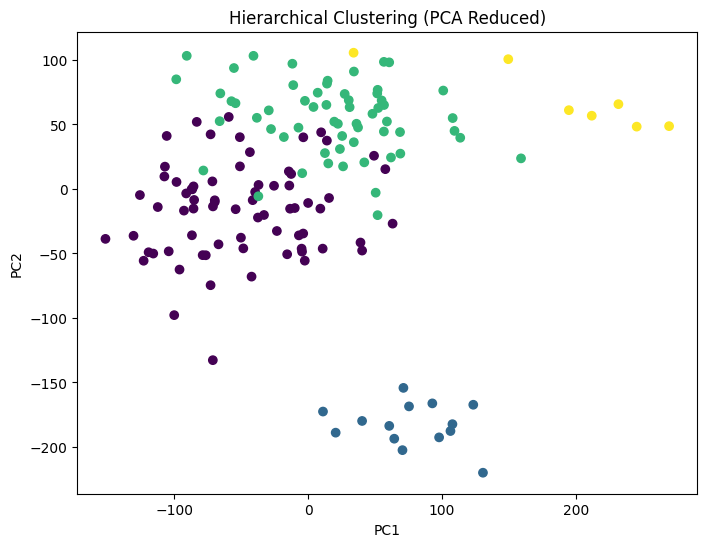

In [15]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

# Perform linkage for dendrogram
linked = linkage(X_pca, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=y.values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Cophenetic correlation
coph_corr, _ = cophenet(linked, pdist(X_pca))
print("Cophenetic Correlation:", coph_corr)

# Cluster assignment (Ward → only Euclidean distance)
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters_hc = hc.fit_predict(X_pca)

data['Cluster_Hierarchical'] = clusters_hc
print("Hierarchical cluster counts:\n", data['Cluster_Hierarchical'].value_counts())

# Compare with true labels
ari_hc = adjusted_rand_score(y, clusters_hc)
print("Adjusted Rand Index (Hierarchical vs True Labels):", ari_hc)

# ✅ Visualize Hierarchical Clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_hc, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Hierarchical Clustering (PCA Reduced)")
plt.show()


# Cluster Profiles

Cluster Profiles (avg expression per cluster):
                    samples  1007_s_at   1053_at    117_at    121_at  \
Cluster_KMeans                                                        
0               129.854167  10.272995  7.862167  6.377902  7.287256   
1               204.621212  10.618233  7.118944  6.246125  7.360966   
2                98.347826   9.939084  7.907219  6.415891  7.236245   
3               161.500000   9.904857  8.808437  5.286330  7.584341   

                1255_g_at   1294_at   1316_at   1320_at  1405_i_at  
Cluster_KMeans                                                      
0                3.233399  7.108064  5.214672  4.795976   8.256696  
1                3.158541  7.635045  5.409617  4.644843   7.677670  
2                3.128488  7.273065  5.392611  4.534351   8.177718  
3                3.239354  6.533271  5.176932  5.055129   6.057817  

Cluster 0: Top 5 expressed genes → ['samples', 'AFFX-hum_alu_at', '1553538_s_at', '1553588_at', '224372_at']



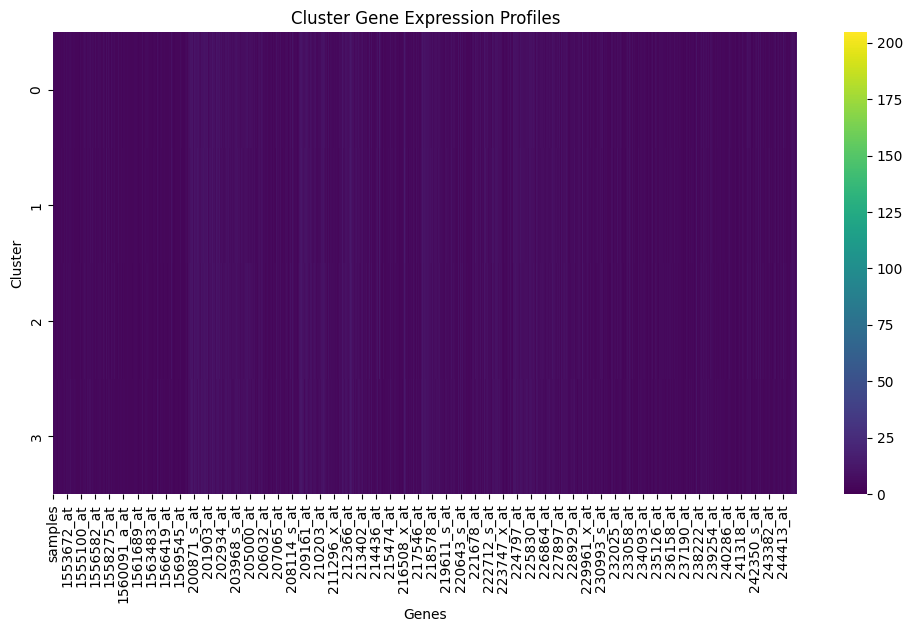

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Keep only numeric columns for averaging
# This ensures non-numeric columns (like IDs or sample names) do not interfere
numeric_cols = data.select_dtypes(include=['number']).columns

# Step 2: Compute mean expression per cluster
# Group by the K-Means cluster labels and calculate average expression
cluster_means = data.groupby('Cluster_KMeans')[numeric_cols].mean()

# Step 3: Print first 10 genes of each cluster profile for quick inspection
print("Cluster Profiles (avg expression per cluster):\n", cluster_means.iloc[:, :10])

# Step 4: Identify top 5 expressed genes for each cluster
# Useful for biological interpretation or feature importance
for c in cluster_means.index:
    top_genes = cluster_means.loc[c].nlargest(5).index.tolist()
    print(f"\nCluster {c}: Top 5 expressed genes → {top_genes}")

# Step 5: Visualize cluster profiles as a heatmap
# A heatmap gives an intuitive view of which clusters have higher expression for which genes
plt.figure(figsize=(12,6))
sns.heatmap(cluster_means, cmap='viridis')
plt.title("Cluster Gene Expression Profiles")
plt.xlabel("Genes")
plt.ylabel("Cluster")
plt.show()


# Save Models

In [17]:
import joblib
joblib.dump(kmeans_final, "breast_gene_kmeans.pkl")
joblib.dump(pca, "breast_pca.pkl")


['breast_pca.pkl']